In [1]:
from urllib.request import urlretrieve

In [2]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x7fc30801e550>)

In [3]:
!pip install pandas --upgrade --quite


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --quite


In [ ]:
"""
Here's a summary of the functions & methods we've looked at so far:
pd.read_csv - Read data from a CSV file into a Pandas DataFrame object
.info() - View basic infomation about rows, columns & data types
.describe() - View statistical information about numeric columns
.columns - Get the list of column names
.shape - Get the number of rows & columns as a tuple
.covid_df['new_cases'] - Retrieving columns as a Series using the column name
.new_cases[243] - Retrieving values from a Series using an index
.covid_df.at[243, 'new_cases'] - Retrieving a single value from a data frame
.covid_df.copy() - Creating a deep copy of a data frame
.covid_df.loc[243] - Retrieving a row or range of rows of data from the data frame
.head, tail, and sample - Retrieving multiple rows of data from the data frame
.covid_df.new_tests.first_valid_index - Finding the first non-empty index in a series
.covid_df.new_cases.sum() - Computing the sum of values in a column or series
.covid_df[covid_df.new_cases > 1000] - Querying a subset of rows satisfying the chosen criteria using boolean expressions
.df['pos_rate'] = df.new_cases/df.new_tests - Adding new columns by combining data from existing columns
.covid_df.drop('positive_rate') - Removing one or more columns from the data frame
.sort_values - Sorting the rows of a data frame using column values
.covid_df.at[172, 'new_cases'] = ... - Replacing a value within the data frame
"""

In [4]:
import pandas as pd

In [5]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [6]:
type(covid_df)

pandas.core.frame.DataFrame

In [7]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [8]:
"""Here's what we can tell by looking at the dataframe:

- The file provides four day-wise counts for COVID-19 in Italy
- The metrics reported are new cases, deaths, and tests
- Data is provided for 248 days: from Dec 12, 2019, to Sep 3, 2020

Keep in mind that these are officially reported numbers. The actual number of cases & deaths may be higher, as not all cases are diagnosed. 

We can view some basic information about the data frame using the `.info` method."""

"Here's what we can tell by looking at the dataframe:\n\n- The file provides four day-wise counts for COVID-19 in Italy\n- The metrics reported are new cases, deaths, and tests\n- Data is provided for 248 days: from Dec 12, 2019, to Sep 3, 2020\n\nKeep in mind that these are officially reported numbers. The actual number of cases & deaths may be higher, as not all cases are diagnosed. \n\nWe can view some basic information about the data frame using the `.info` method."

In [9]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [10]:
#It appears that each column contains values of a specific data type. You can view statistical information for numerical columns (mean, standard deviation, minimum/maximum values, and the number of non-empty values) using the `.describe` method.
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [11]:
#The `columns` property contains the list of columns within the data frame.
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [12]:
covid_df.shape

(248, 4)

In [13]:
#Retrieving data from a data frame
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

In [14]:
# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

In [15]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [16]:
#Each column is represented using a data structure called `Series`, which is essentially a numpy array with some extra methods and properties.

covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [17]:
type(covid_df['new_cases'])

pandas.core.series.Series

In [18]:
#retrieve a specific value with a series using the indexing notation []
covid_df['new_cases'][246]

975.0

In [19]:
covid_df['new_tests'][240]

57640.0

In [20]:
#Pandas also provides the `.at` method to retrieve the element at a specific row & column directly.
covid_df.at[246, 'new_cases']

975.0

In [21]:
covid_df.at[240, 'new_tests']

57640.0

In [22]:
#Instead of using the indexing notation `[]`, Pandas also allows accessing columns as properties of the dataframe using the `.` notation. However, this method only works for columns whose names do not contain spaces or special characters.
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [23]:
#Further, you can also pass a list of columns within the indexing notation `[]` to access a subset of the data frame with just the given columns.
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [24]:
# need a full copy of the data frame, in which case you can use the copy method
covid_df_copy = covid_df.copy()

In [25]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [26]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [27]:
#Each retrieved row is also a `Series` object.

In [28]:
#We can use the `.head` and `.tail` methods to view the first or last few rows of data.
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [29]:
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [30]:
covid_df.at[0, 'new_tests']

nan

In [31]:
type(covid_df.at[0, 'new_tests'])

numpy.float64

In [32]:
#We can find the first index that doesn't contain a NaN value using a column's first_valid_index method.
covid_df.new_tests.first_valid_index()

111

In [33]:
# passing a range to loc
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [34]:
#.sample method to retrieve a random sample of rows from the data frame
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
8,2020-01-08,0.0,0.0,NaN
83,2020-03-23,5560.0,649.0,NaN
239,2020-08-26,876.0,4.0,58054.0
96,2020-04-05,4805.0,681.0,NaN
191,2020-07-09,193.0,15.0,29947.0
197,2020-07-15,114.0,17.0,28392.0
180,2020-06-28,175.0,8.0,21183.0
110,2020-04-19,3491.0,480.0,NaN
1,2020-01-01,0.0,0.0,NaN
88,2020-03-28,5959.0,971.0,NaN


Analyzing data from data frames

In [35]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [36]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 271515 and the number of reported deaths is 35497.


In [37]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [38]:
print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

The overall reported death rate in Italy is 13.07 %.


In [39]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [40]:
total_tests

5214766.0

In [41]:
positive_rate = total_cases / total_tests

In [42]:
print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis.


In [43]:
#Querying and sorting rows
high_new_cases = covid_df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [44]:
#The boolean expression returns a series containing True and False boolean values. You can use this series to select a subset of rows from the original dataframe, corresponding to the True values in the series.
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [45]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [46]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [47]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [48]:
positive_rate

0.05206657403227681

In [49]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [50]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [51]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

In [52]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [53]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [54]:
covid_df.drop(columns=['positive_rate'], inplace=True)

In [55]:
#### Sorting rows using column values

####The rows can also be sorted by a specific column using `.sort_values`. Let's sort to identify the days with the highest number of cases, then chain it with the `head` method to list just the first ten results.
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [56]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [57]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [58]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


In [59]:
##You can use the .at method to modify a specific value within the dataframe.
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

Working with dates

In [60]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [61]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [62]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [63]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [64]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

In [65]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [66]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [67]:
# Overall average
covid_df.new_cases.mean()

1096.6149193548388

In [68]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

In [69]:
#Grouping and aggregation
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [70]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [71]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [72]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [75]:
#Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to each row's date. We can use the `cumsum` method to compute the cumulative sum of a column as a new series. Let's add three new columns: `total_cases`, `total_deaths`, and `total_tests`.
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

In [76]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


Merging data from multiple sources


In [77]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x7fc31b1ceca0>)

In [78]:
locations_df = pd.read_csv('locations.csv')

In [79]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [80]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [81]:
covid_df['location'] = "Italy"

In [82]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


In [83]:
#We can now add the columns from `locations_df` into `covid_df` using the `.merge` method.


In [84]:
merged_df = covid_df.merge(locations_df, on="location")

In [85]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [86]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population


In [87]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [88]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [89]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


In [90]:
#Writing data back to files

In [91]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [92]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,4476.121695,586.998461,NaN


In [95]:
result_df.to_csv('results.csv', index=None)

Basic Plotting with Pandas

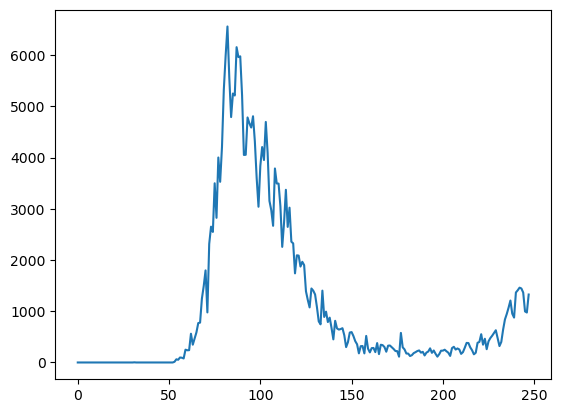

In [96]:
result_df.new_cases.plot();

In [97]:
result_df.set_index('date', inplace=True)

In [99]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403


In [100]:
#the index of a data frame doesn't have to be numeric. Using the date as the index also allows us to get the data for a specific data using .loc.
result_df.loc['2020-09-01']

new_cases             9.960000e+02
total_cases           2.696595e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           5.214766e+06
cases_per_million     4.459996e+03
deaths_per_million    5.868661e+02
tests_per_million     8.624890e+04
Name: 2020-09-01 00:00:00, dtype: float64

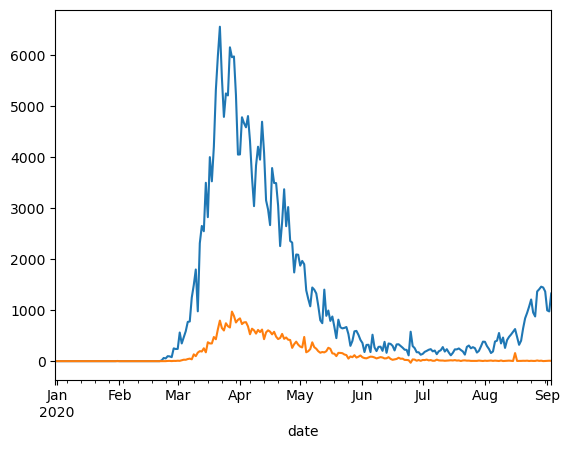

In [101]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

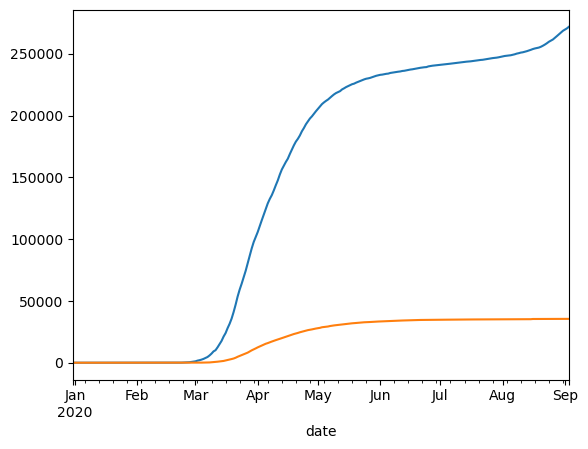

In [102]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

In [103]:
death_rate = result_df.total_deaths / result_df.total_cases

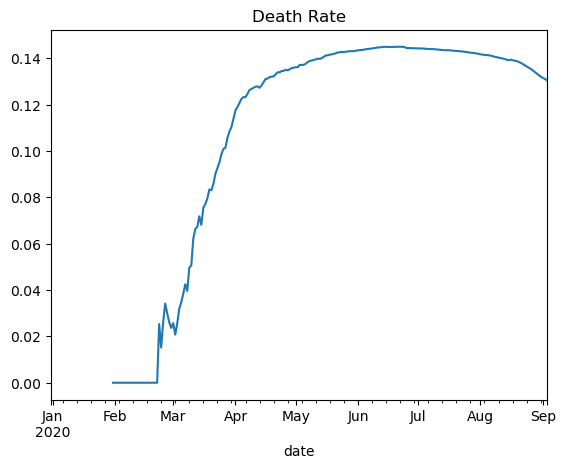

In [104]:
death_rate.plot(title='Death Rate');

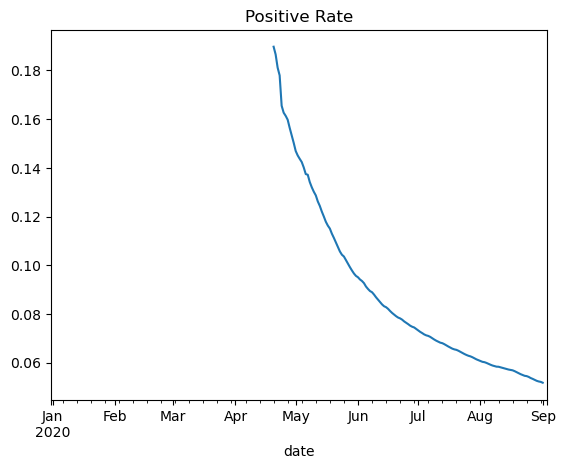

In [105]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');

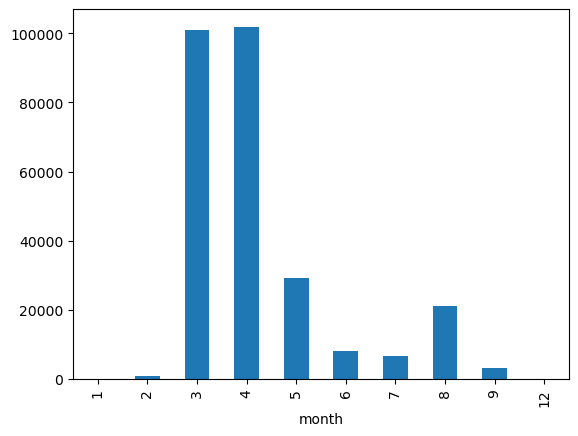

In [106]:
covid_month_df.new_cases.plot(kind='bar');

<AxesSubplot:xlabel='month'>

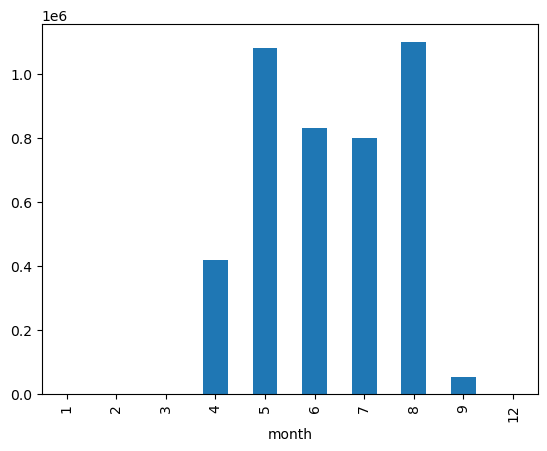

In [107]:
covid_month_df.new_tests.plot(kind='bar')

In [108]:
from urllib.request import urlretrieve

urlretrieve('https://gist.githubusercontent.com/aakashns/28b2e504b3350afd9bdb157893f9725c/raw/994b65665757f4f8887db1c85986a897abb23d84/countries.csv', 
            'countries.csv')

('countries.csv', <http.client.HTTPMessage at 0x7fc2d81731f0>)

In [109]:
countries_df = pd.read_csv('countries.csv')

In [110]:
countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


In [111]:
num_countries = countries_df.shape[0]

In [112]:
print('There are {} countries in the dataset'.format(num_countries))

There are 210 countries in the dataset


In [113]:
continents = countries_df.continent.unique()

In [114]:
continents

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [115]:
total_population = countries_df.population.sum()

In [116]:
print('The total population is {}.'.format(int(total_population)))

The total population is 7757980095.


In [117]:
total_population

7757980095.0

In [118]:
most_populous_df = countries_df.sort_values(by=['population'], ascending=False).head(10)

In [119]:
most_populous_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
41,China,Asia,1.439324e+09,76.91,4.34,15308.712
90,India,Asia,1.380004e+09,69.66,0.53,6426.674
199,United States,North America,3.310026e+08,78.86,2.77,54225.446
91,Indonesia,Asia,2.735236e+08,71.72,1.04,11188.744
145,Pakistan,Asia,2.208923e+08,67.27,0.60,5034.708
27,Brazil,South America,2.125594e+08,75.88,2.20,14103.452
141,Nigeria,Africa,2.061396e+08,54.69,NaN,5338.454
15,Bangladesh,Asia,1.646894e+08,72.59,0.80,3523.984
157,Russia,Europe,1.459345e+08,72.58,8.05,24765.954
125,Mexico,North America,1.289328e+08,75.05,1.38,17336.469


In [120]:
countries_df['gdp'] = countries_df.population * countries_df.gdp_per_capita

In [121]:
countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,gdp
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,7.022622e+10
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,3.396791e+10
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,6.101364e+11
3,Andorra,Europe,77265.0,83.73,NaN,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,1.912651e+11
...,...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884,6.007624e+11
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147,4.411699e+10
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251,6.782303e+10


In [122]:
country_counts_df = countries_df.groupby(['continent'])['location'].count()

In [123]:
country_counts_df

continent
Africa           55
Asia             47
Europe           51
North America    36
Oceania           8
South America    13
Name: location, dtype: int64

In [124]:
continent_populations_df = countries_df.groupby(['continent'])['population'].sum()

In [125]:
continent_populations_df

continent
Africa           1.339424e+09
Asia             4.607388e+09
Europe           7.485062e+08
North America    5.912425e+08
Oceania          4.095832e+07
South America    4.304611e+08
Name: population, dtype: float64

<AxesSubplot:>

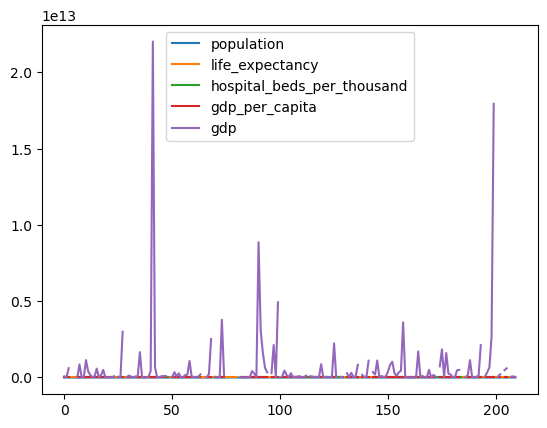

In [126]:
countries_df.plot()

<AxesSubplot:>

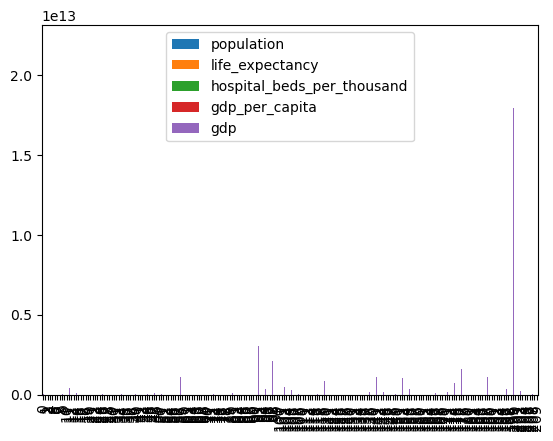

In [128]:
countries_df.plot(kind='bar')

<AxesSubplot:>

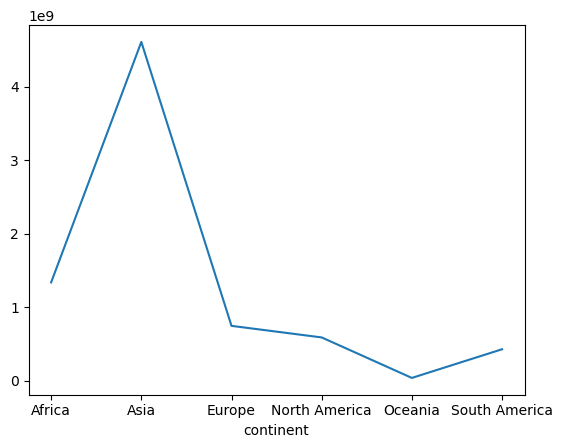

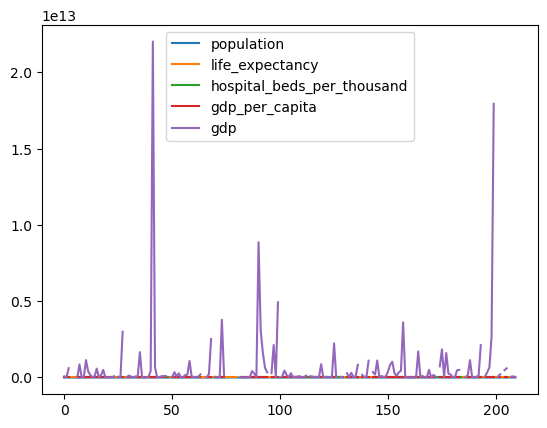

In [129]:
continent_populations_df.plot()
countries_df.plot()